# Lineáris regresszió

## Lineáris regresszió SciPy segítségével
A scipy segítségével könnyedén alkalmazható egyszerű lineáris regresszió tetszőleges adathalmazon. Az egyszerűség kedvéért most egy beépített adathalmazon kerül a lineáris regressziónak bemutatására sor.

Először importáljuk be a megfelelő adathalmazt, amivel regresszió vizsgálható, például a diabetes adathalmaz:

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
df = diabetes['data'].join(diabetes['target'])

Mivel regresszióról van szó, így lesz két olyan változónk, amely között valamilyen függvény illeszthető. Nézzük adathalmazunkat.

In [2]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


Nézzük meg, mi az eset például a BMI és a diabetes érték között:

In [3]:
import matplotlib.pyplot as plt

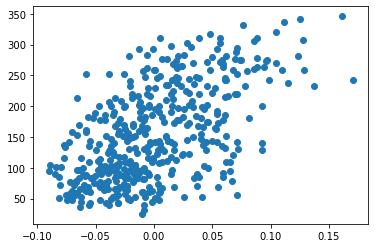

In [4]:
plt.scatter(df['bmi'], df['target'])

Ezen az adathalmazon egy egyenes - lineáris modell - illeszthető, még ha szemmel láthatóan a korreláció mértéke nem is nagy. Emlékeztetőleg, a lineáris regresszió során egy olyan lineáris becslőt keresünk, amelyben:
$$\hat{y}=\theta X + b$$
És keressük azokat a $\theta, b$ értékeket, mellyel modellünk egy metrikának megfelelően a legoptimálisabban illeszkedik (vö. legkisebb hiba). Legegyszerűbben ezt optimalizálás segítségével valósíthatjuk meg, például gradient descent segítségével.

Sok esetben az optimalizálás implementálsával nem szükséges foglalkoznunk, általában ezek az algoritmusok beépített részei a legtöbb keretrendszernek (ugyanúgy az sklearn és a később bemutatásra kerülő Tensorflow és PyTorch keretrendszereknek is). A keretrendszer ezeket jellemzően elfedi, általában az egyes módszerek közül tudunk választani, amit az illesztéshez szeretnénk használni.

A lineáris regresszióhoz importáljuk be a megfelelő modulokat:

In [5]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

Válasszuk szét az adathalmazunkat tanító és tesztadathalmazra:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(diabetes['data'], diabetes['target'], random_state=0)

Bemenetként adjuk meg a BMI értékeket:

In [7]:
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
20,-0.049105,-0.044642,-0.056863,-0.043542,-0.045599,-0.043276,0.000779,-0.039493,-0.011901,0.015491
353,-0.052738,-0.044642,-0.055785,-0.036656,0.089244,-0.003193,0.008142,0.034309,0.132373,0.003064
281,-0.092695,0.050680,-0.090275,-0.057314,-0.024960,-0.030437,-0.006584,-0.002592,0.024053,0.003064
14,0.045341,-0.044642,-0.025607,-0.012556,0.017694,-0.000061,0.081775,-0.039493,-0.031991,-0.075636
300,0.016281,-0.044642,0.073552,-0.041247,-0.004321,-0.013527,-0.013948,-0.001116,0.042896,0.044485
...,...,...,...,...,...,...,...,...,...,...
323,0.070769,0.050680,-0.007284,0.049415,0.060349,-0.004445,-0.054446,0.108111,0.129019,0.056912
192,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029528,-0.059067
117,0.059871,-0.044642,-0.021295,0.087287,0.045213,0.031567,-0.047082,0.071210,0.079121,0.135612
47,-0.078165,-0.044642,-0.073030,-0.057314,-0.084126,-0.074277,-0.024993,-0.039493,-0.018118,-0.083920


In [8]:
import numpy as np
regr.fit(np.array(X_train['bmi']).reshape(-1, 1), Y_train)
diabetes_y_pred = regr.predict(np.array(X_test['bmi']).reshape(-1, 1))

A hiba metrikákat is tartalmazza az sklearn csomag, ami felhasználható a kiértékeléshez, importáljuk be ezeket:

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

Írjuk ki az illesztés eredményét (együtthatók, hiba mértéke, korreláció, stb.):

In [10]:
print("Együtthatók: {0}".format(regr.coef_))
print("b: {0}".format(regr.intercept_))
print("MSE értéke: {0}".format(mean_squared_error(diabetes_y_pred, Y_test)))
print("R2 pontszám: {0}".format(r2_score(Y_test, diabetes_y_pred)))

Együtthatók: [1016.92353894]
b: 153.2256898080062
MSE értéke: 4181.423410366638
R2 pontszám: 0.15772057992609445


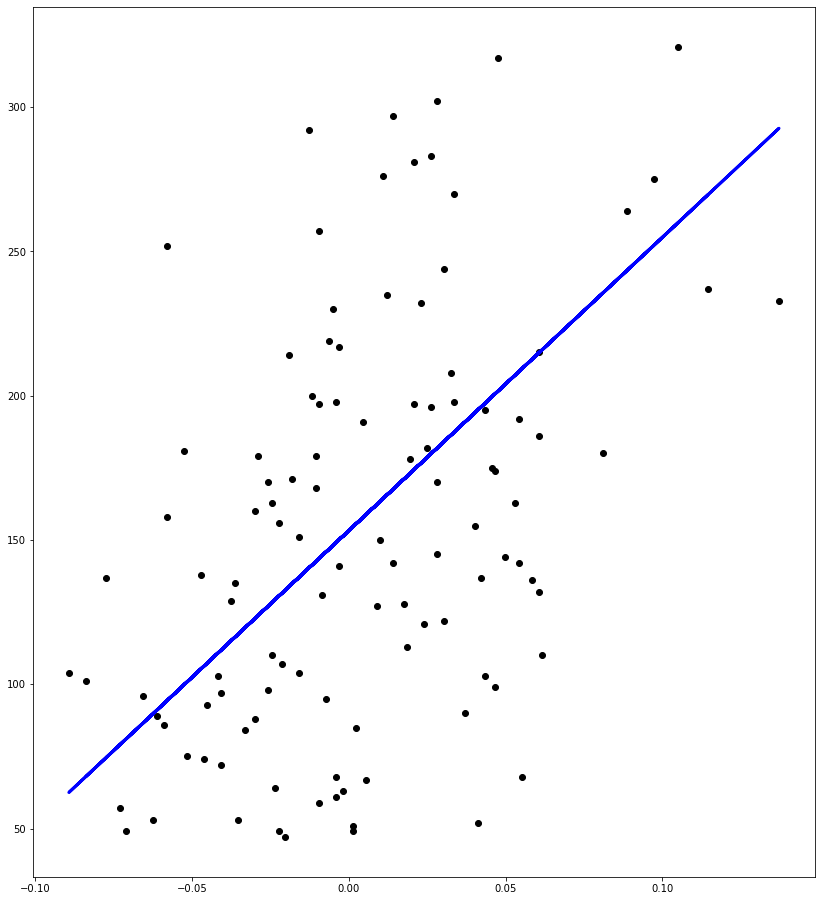

In [11]:
plt.figure(figsize=(14,16))
plt.scatter(X_test['bmi'], Y_test,  color='black')
plt.plot(X_test['bmi'], diabetes_y_pred, color='blue', linewidth=3)

Látható, hogy bár egyenesünk valamelyest illeszkedik az adathalmazra, ahogy az várható volt nem ad vissza túl jó eredményt.

Természetesen a lineáris regresszió bemenete lehet többdimenziós is. Erre példát adhat a következő plottok eredménye:

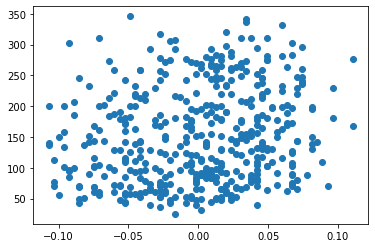

In [12]:
plt.scatter(df['age'], df['target'])

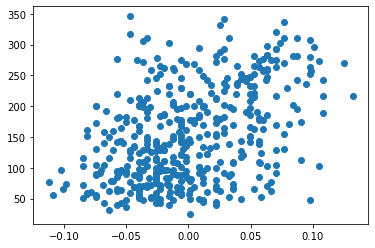

In [13]:
plt.scatter(df['bp'], df['target'])

Hajtsuk végre a tanítást a BMI, BP és életkor oszlopok bevonásával:

In [14]:
regr_multi = linear_model.LinearRegression()
regr_multi.fit(np.array(X_train[['age','bmi', 'bp']]), Y_train)
diabetes_y_pred = regr_multi.predict(np.array(X_test[['age','bmi', 'bp']]))

Nézzük a tanítás eredményét a kiegészített adathalmazon:

In [15]:
print("Együtthatók: {0}".format(regr_multi.coef_))
print("b: {0}".format(regr_multi.intercept_))
print("MSE értéke: {0}".format(mean_squared_error(diabetes_y_pred, Y_test)))
print("R2 pontszám: {0}".format(r2_score(Y_test, diabetes_y_pred)))

Együtthatók: [ -5.95979463 855.77998295 385.38938424]
b: 153.38447528991486
MSE értéke: 3745.2748665191402
R2 pontszám: 0.24557557726197465


Látható, hogy valamelyest jobb eredményt értünk el több adatoszlop használatával.